In [76]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import eli5
from eli5.sklearn import PermutationImportance
from collections import Counter
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

In [5]:
%time data = pd.read_csv("data.csv")

data.head()

Wall time: 439 ms


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
#Data Cleaning

In [8]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

data.drop(['Photo', 'Flag', 'Club Logo'], axis = 1, inplace = True)

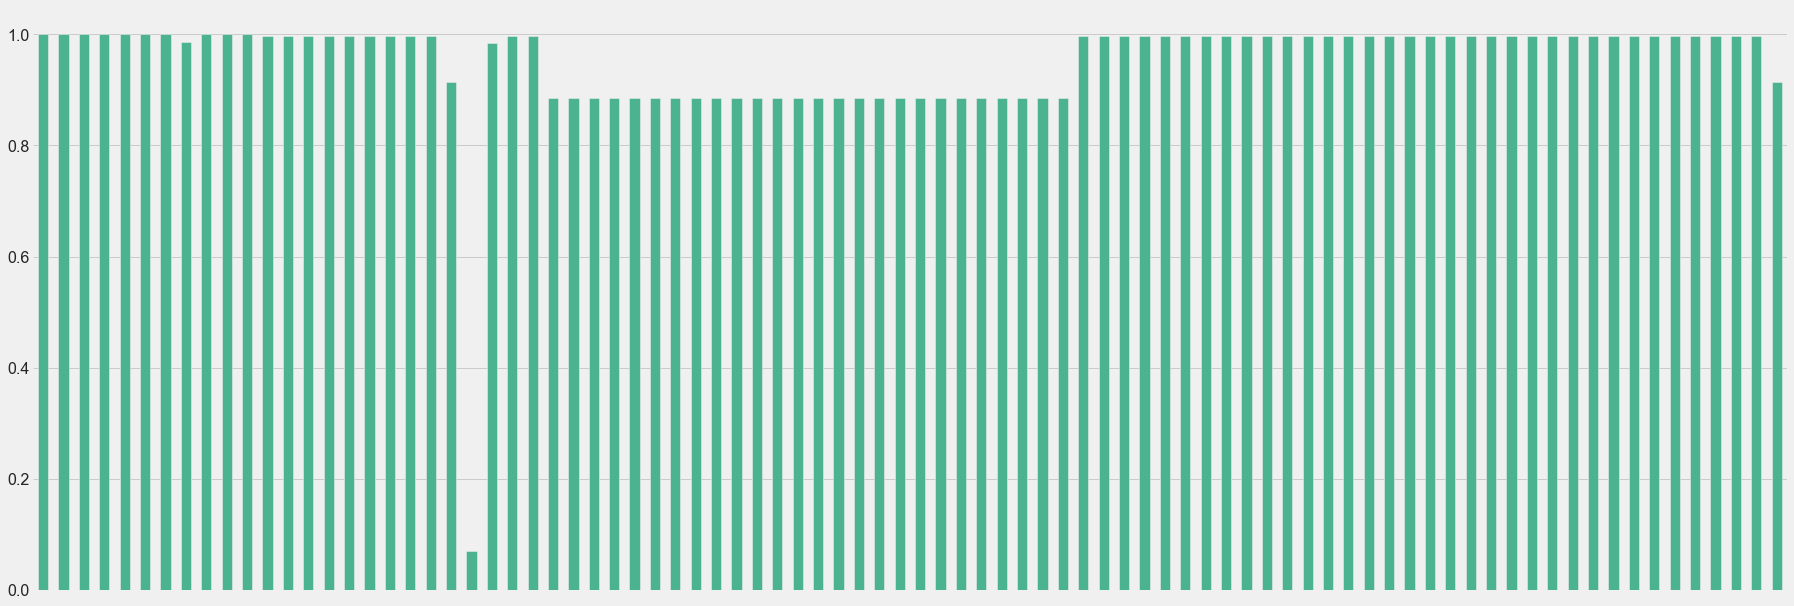

In [21]:
msno.bar(data.sample( 18207 ), (28,10), color = "#4CB391")

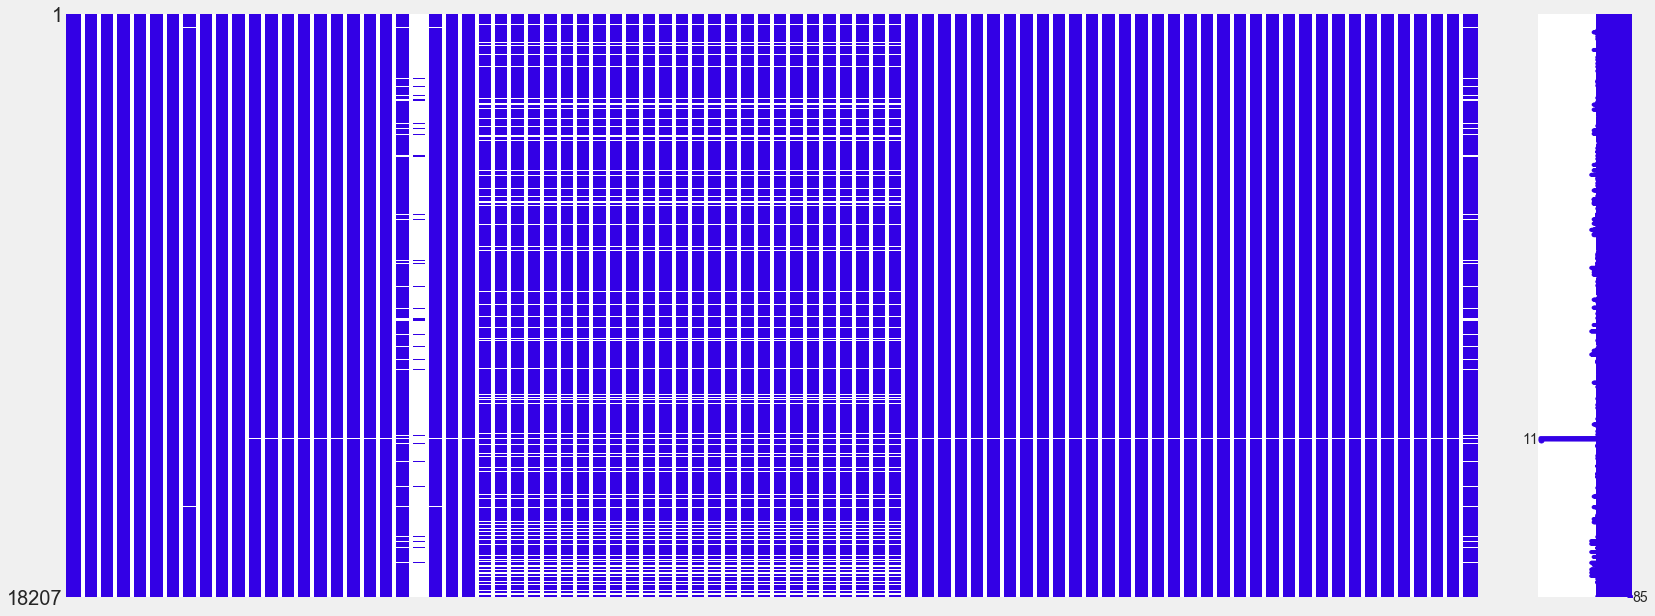

In [28]:
#Missing data in form of white lines 
msno.matrix(data, color = (0.2,0,0.9))

In [29]:
data.drop(['Loaned From'], axis = 1, inplace = True)

In [57]:
# checking if the data contains any NULL value

data.info()

#data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 85 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18207 non-null object
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves                 18207 non-null float64
Work Rate                   18207 non-null object
Body Type                   18207 non-null object
Real Face                   18207 non-null o

In [54]:
# filling the missing value for the continous variables for proper data visualization

data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'].mean(), inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)

In [56]:
data.fillna(0, inplace = True)

In [ ]:
#Data Analysis

In [32]:
#Number of countries available and top 10 countries with highest number of players

print('Total number of countries : {0}'.format(data['Nationality'].nunique()))
print(data['Nationality'].value_counts().head(10))

#European Countries have most players

Total number of countries : 164
England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64


In [43]:
def country(x):
    return data[data['Nationality'] == x][['Name','Overall','Potential','Position']]

# let's check the players by country

country('Brazil')

,Name,Overall,Potential,Position
2,Neymar Jr,92,93,LW
27,Casemiro,88,90,CDM
32,Coutinho,88,89,LW
35,Marcelo,88,88,LB
39,Thiago Silva,88,88,RCB
...,...,...,...,...
17059,Gianluca Zanette,55,66,GK
17446,Strefezza,54,62,RW
17588,Lucas Ribeiro,53,71,LM
17611,Felipe Ferreyra,53,67,ST


In [39]:
#Total number of clubs present and top 10 clubs with highest number of players

print('Total number of clubs : {0}'.format(data['Club'].nunique()))
print(data['Club'].value_counts().head(10))

Total number of clubs : 651
Borussia Dortmund    33
Empoli               33
RC Celta             33
Newcastle United     33
CD Leganés           33
Arsenal              33
Burnley              33
AS Monaco            33
Valencia CF          33
Cardiff City         33
Name: Club, dtype: int64


In [41]:
def club(x):
    return data[data['Club'] == x][['Name','Jersey Number','Position','Overall','Nationality','Age','Wage',
                                    'Value','Contract Valid Until']]

club('FC Barcelona')

,Name,Jersey Number,Position,Overall,Nationality,Age,Wage,Value,Contract Valid Until
0,L. Messi,10.0,RF,94,Argentina,31,€565K,€110.5M,2021
7,L. Suárez,9.0,RS,91,Uruguay,31,€455K,€80M,2021
18,M. ter Stegen,22.0,GK,89,Germany,26,€240K,€58M,2022
20,Sergio Busquets,5.0,CDM,89,Spain,29,€315K,€51.5M,2023
32,Coutinho,7.0,LW,88,Brazil,26,€340K,€69.5M,2023
42,S. Umtiti,23.0,CB,87,France,24,€205K,€57M,2023
49,Jordi Alba,18.0,LB,87,Spain,29,€250K,€38M,2020
53,I. Rakitić,4.0,RCM,87,Croatia,30,€260K,€46.5M,2021
54,Piqué,3.0,RCB,87,Spain,31,€240K,€34M,2022
96,A. Vidal,8.0,CAM,85,Chile,31,€205K,€26M,2021


In [48]:
#Player with maximum Potential and Overall Performance

print('Maximum Potential : '+str(data.loc[data['Potential'].idxmax()][2]))
print('Maximum Overall Perforamnce : '+str(data.loc[data['Overall'].idxmax()][2]))

Maximum Potential : K. Mbappé
Maximum Overall Perforamnce : L. Messi


In [59]:
pr_cols = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

i = 0

while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i], data.loc[data[pr_cols[i]].idxmax()][1]))
    i += 1


Best Crossing : 192985
Best Finishing : 158023
Best HeadingAccuracy : 171919
Best ShortPassing : 177003
Best Volleys : 179813
Best Dribbling : 158023
Best Curve : 20775
Best FKAccuracy : 158023
Best LongPassing : 182521
Best BallControl : 158023
Best Acceleration : 190483
Best SprintSpeed : 231747
Best Agility : 190871
Best Reactions : 20801
Best Balance : 205525
Best ShotPower : 20801
Best Jumping : 20801
Best Stamina : 215914
Best Strength : 156321
Best LongShots : 158023
Best Aggression : 213689
Best Interceptions : 215914
Best Positioning : 20801
Best Vision : 158023
Best Penalties : 186627
Best Composure : 158023
Best Marking : 137186
Best StandingTackle : 138956
Best SlidingTackle : 155862
Best GKDiving : 193080
Best GKHandling : 200389
Best GKKicking : 167495
Best GKPositioning : 1179
Best GKReflexes : 193080


In [60]:
def value_to_int(data_value):
    try:
        value = float(data_value[1:-1])
        suffix = data_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

data['Value'] = data['Value'].apply(value_to_int)
data['Wage'] = data['Wage'].apply(value_to_int)

In [66]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [63]:
#Top earners

print('Most valued player : '+str(data.loc[data['Value'].idxmax()][2]))
print('Highest earner : '+str(data.loc[data['Wage'].idxmax()][2]))

Most valued player : Neymar Jr
Highest earner : L. Messi


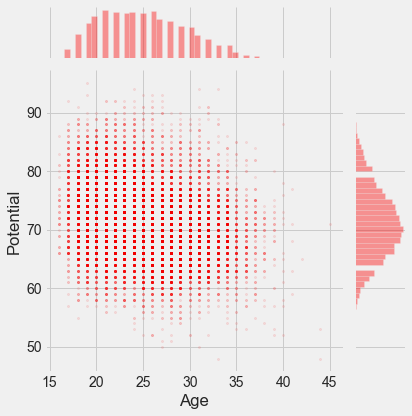

In [68]:
sns.jointplot(x = data['Age'], y = data['Potential'],
              joint_kws = {'alpha':0.1,'s':5,'color':'red'},
              marginal_kws = {'color':'red'})


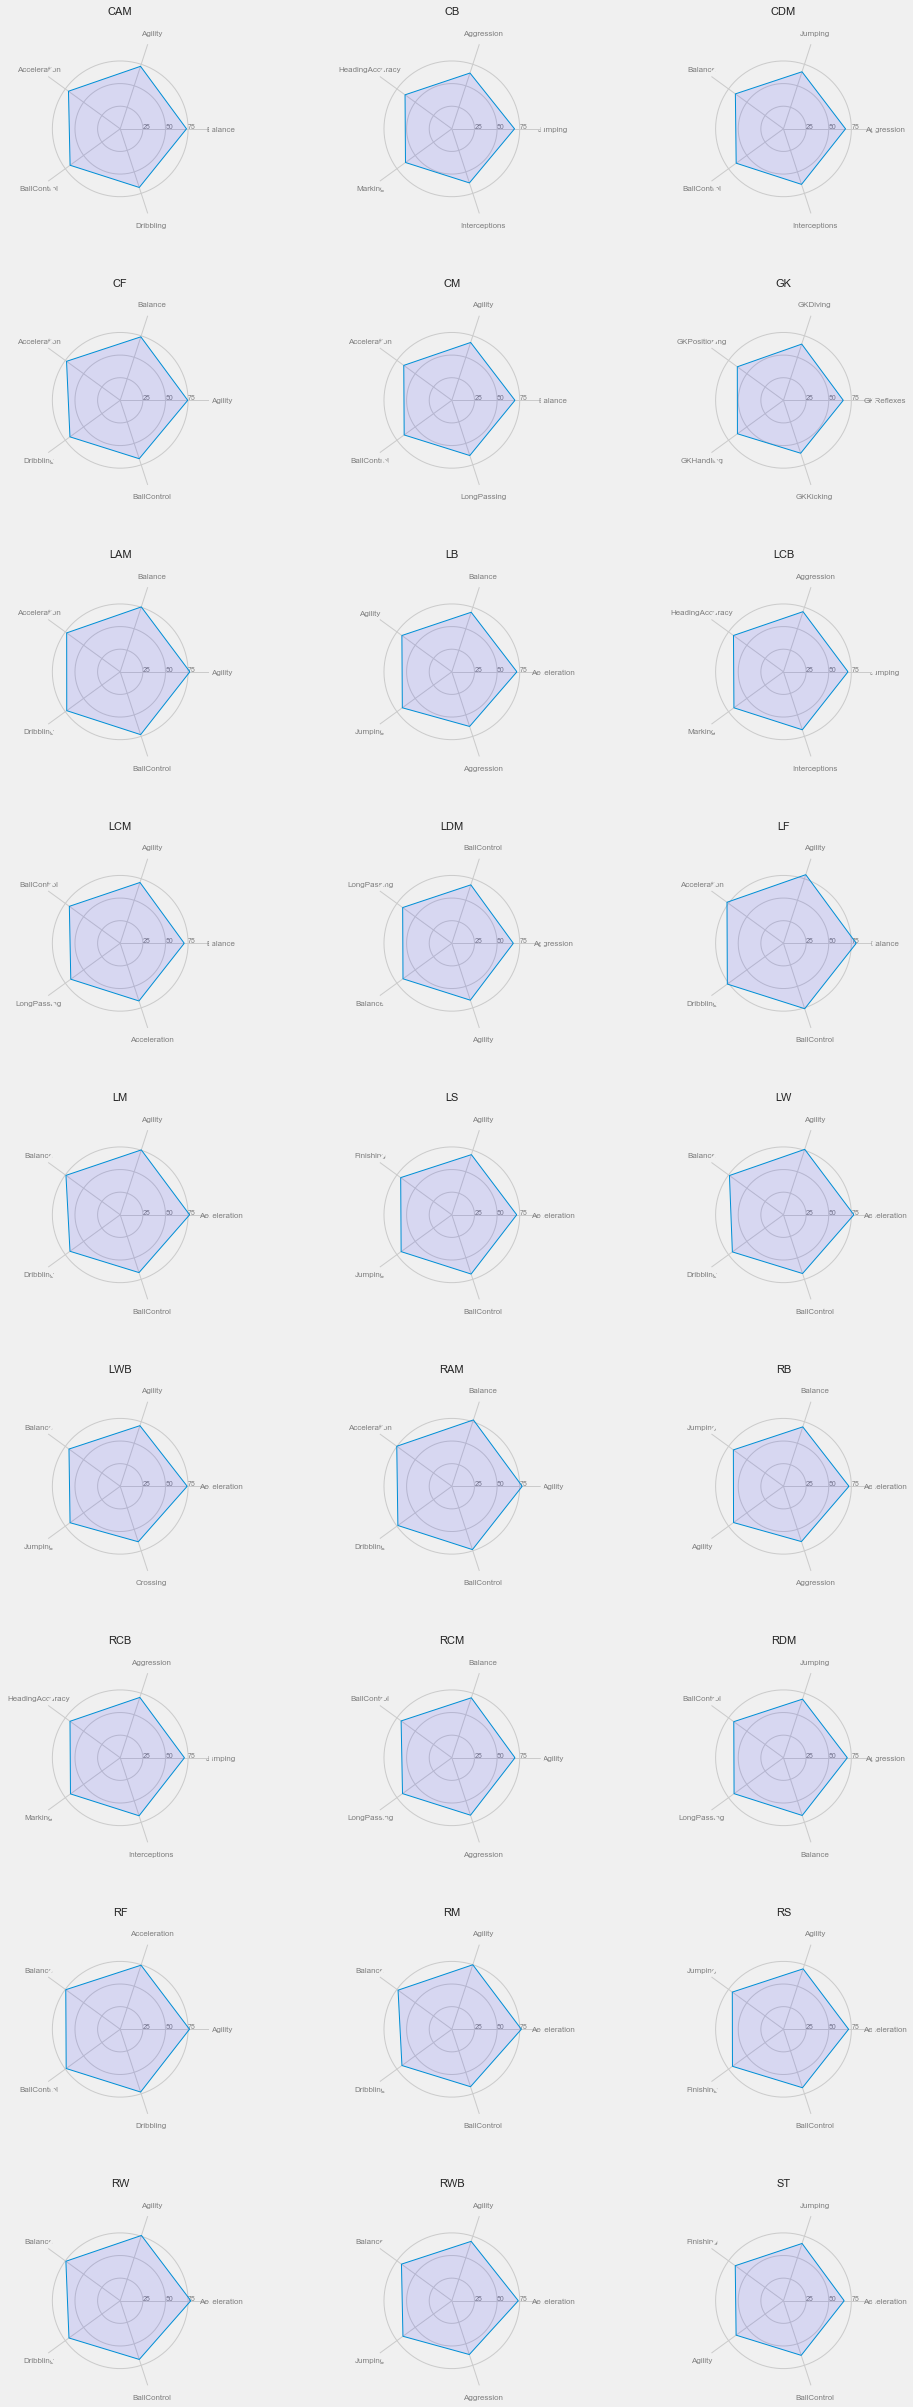

In [69]:
player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties')

from math import pi
idx = 1

plt.figure(figsize = (15,45))

for position_name, features in data.groupby(data['Position'])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    
    # number of variable
    categories = top_features.keys()
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(10, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    
    plt.subplots_adjust(hspace = 0.5)
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
    plt.title(position_name, size = 11, y = 1.1)
    
    idx += 1

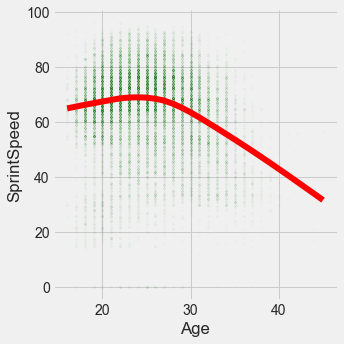

In [73]:
sns.lmplot(data = data, x = 'Age', y = 'SprintSpeed', lowess = True, scatter_kws = {'alpha':0.01, 's':5,'color':'green'}, 
           line_kws = {'color':'r'})

#As the age increases the sprint speed decreases

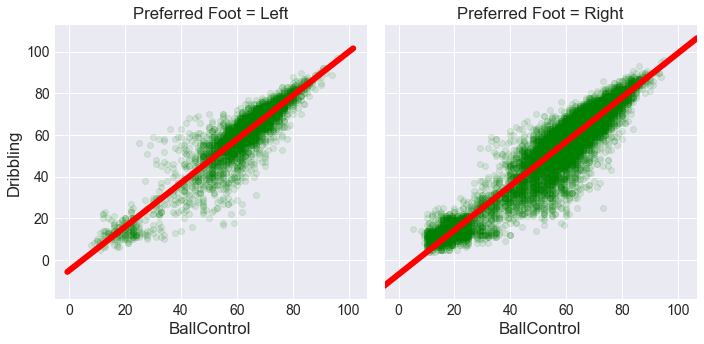

In [77]:
# Better is left-footed or rigth-footed players?

sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot',
           scatter_kws = {'alpha':0.1,'color':'green'},
           line_kws = {'color':'red'})

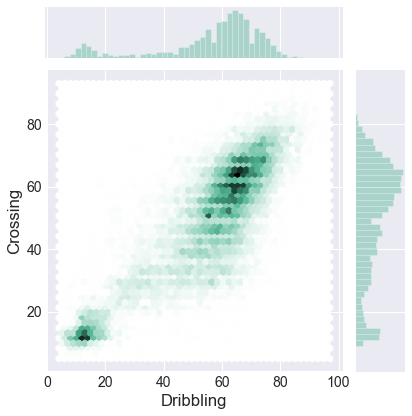

In [78]:
# Crossing vs. dribbling

sns.jointplot(x = data['Dribbling'], y = data['Crossing'], kind = "hex", color = "#4CB391");

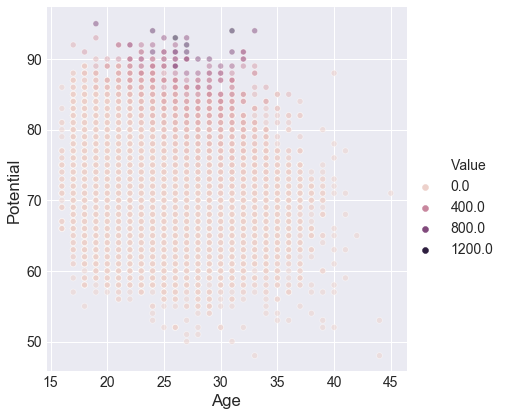

In [80]:
# Relation potential and age with respected value of players

value = data.Value
cmap = sns.cubehelix_palette(rot = -.2, as_cmap = True)

sns.relplot(x = "Age", y = "Potential", hue = value/100000, 
            sizes = (40, 400), alpha = .5,
            height = 6, data = data);

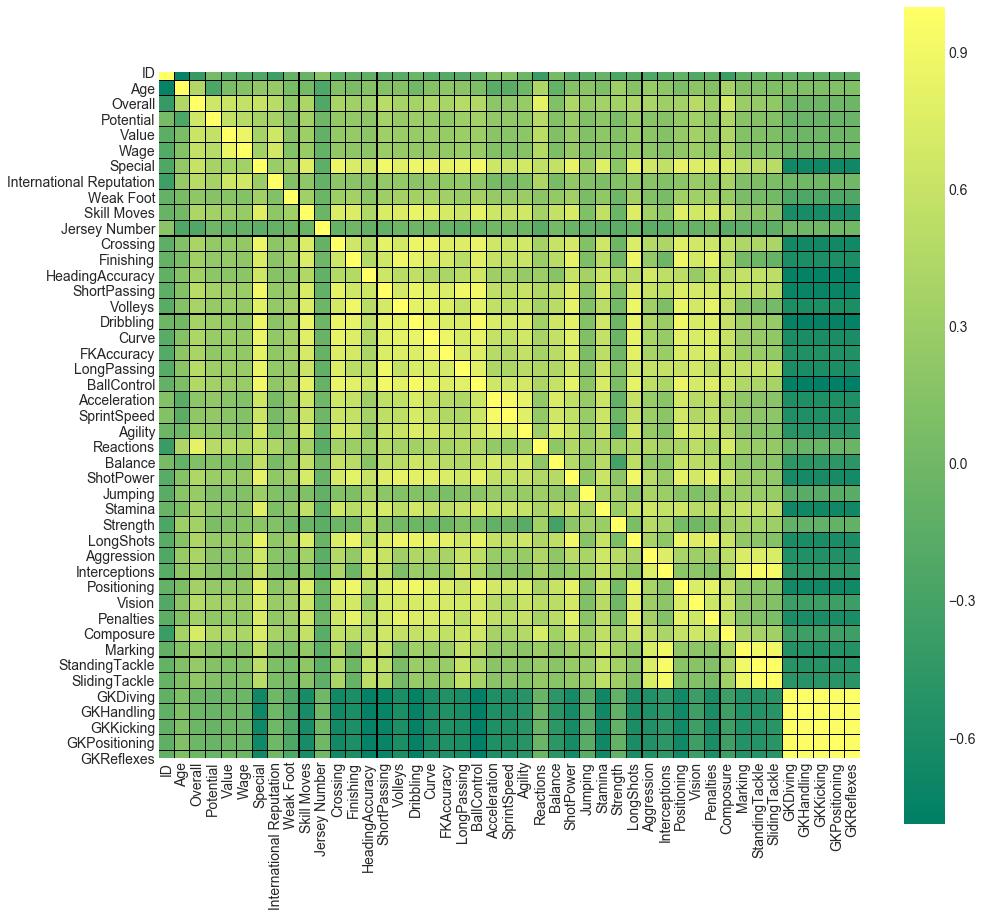

In [81]:
plt.figure(figsize = (14,14))

sns.heatmap(data.corr(), linewidths = 0.1, linecolor = 'black', square = True, cmap = 'summer')

#Lowest correlation among the goalkeeping side with other columns and high among themselves 
#High correlation between Dribbling, Volleys, Passing etc...

In [ ]:
#Modelling

In [82]:
df = pd.read_csv("data.csv")

In [83]:
#DROP UNNECESSARY VALUES

drop_cols = df.columns[28:54]
df = df.drop(drop_cols, axis = 1)

df = df.drop(['Unnamed: 0','ID','Photo','Flag','Club Logo','Jersey Number','Joined','Special','Loaned From','Body Type', 'Release Clause',
               'Weight','Height','Contract Valid Until','Wage','Value','Name','Club'], axis = 1)

df = df.dropna()


In [84]:
df.head()

,Age,Nationality,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Real Face,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,Left,5.0,4.0,4.0,Medium/ Medium,Yes,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Right,5.0,4.0,5.0,High/ Low,Yes,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Right,5.0,5.0,5.0,High/ Medium,Yes,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,91,93,Right,4.0,3.0,1.0,Medium/ Medium,Yes,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,91,92,Right,4.0,5.0,4.0,High/ High,Yes,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [86]:
#Turn Real Face into a binary indicator variable

def face_to_num(df):
    if (df['Real Face'] == 'Yes'):
        return 1
    else:
        return 0
    
#Turn Preferred Foot into a binary indicator variable
def right_footed(df):
    if (df['Preferred Foot'] == 'Right'):
        return 1
    else:
        return 0

#Create a simplified position varaible to account for all player positions
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    elif ((df['Position'] == 'RB') | (df['Position'] == 'LB') | (df['Position'] == 'CB') | (df['Position'] == 'LCB') | (df['Position'] == 'RCB') | (df['Position'] == 'RWB') | (df['Position'] == 'LWB') ):
        return 'DF'
    elif ((df['Position'] == 'LDM') | (df['Position'] == 'CDM') | (df['Position'] == 'RDM')):
        return 'DM'
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM') | (df['Position'] == 'CM') | (df['Position'] == 'RCM') | (df['Position'] == 'RM')):
        return 'MF'
    elif ((df['Position'] == 'LAM') | (df['Position'] == 'CAM') | (df['Position'] == 'RAM') | (df['Position'] == 'LW') | (df['Position'] == 'RW')):
        return 'AM'
    elif ((df['Position'] == 'RS') | (df['Position'] == 'ST') | (df['Position'] == 'LS') | (df['Position'] == 'CF') | (df['Position'] == 'LF') | (df['Position'] == 'RF')):
        return 'ST'
    else:
        return df.Position

In [88]:
#Get a count of Nationalities in the Dataset, make of list of those with over 250 Players (our Major Nations)
nat_counts = df.Nationality.value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

#Replace Nationality with a binary indicator variable for 'Major Nation'
def major_nation(df):
    if (df.Nationality in nat_list):
        return 1
    else:
        return 0

#Create a copy of the original dataframe to avoid indexing errors
df1 = df.copy()

#Apply changes to dataset to create new column
df1['Real_Face'] = df1.apply(face_to_num, axis=1)
df1['Right_Foot'] = df1.apply(right_footed, axis=1)
df1['Simple_Position'] = df1.apply(simple_position,axis = 1)
df1['Major_Nation'] = df1.apply(major_nation,axis = 1)

#Split the Work Rate Column in two
tempwork = df1["Work Rate"].str.split("/ ", n = 1, expand = True) 

#Create new column for first work rate
df1["WorkRate1"]= tempwork[0]   

#Create new column for second work rate
df1["WorkRate2"]= tempwork[1]

#Drop original columns used
df1 = df1.drop(['Work Rate','Preferred Foot','Real Face', 'Position','Nationality'], axis = 1)
df1.head()

,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Real_Face,Right_Foot,Simple_Position,Major_Nation,WorkRate1,WorkRate2
0,31,94,94,5.0,4.0,4.0,84.0,95.0,70.0,90.0,...,11.0,15.0,14.0,8.0,1,0,ST,1,Medium,Medium
1,33,94,94,5.0,4.0,5.0,84.0,94.0,89.0,81.0,...,11.0,15.0,14.0,11.0,1,1,ST,1,High,Low
2,26,92,93,5.0,5.0,5.0,79.0,87.0,62.0,84.0,...,9.0,15.0,15.0,11.0,1,1,AM,1,High,Medium
3,27,91,93,4.0,3.0,1.0,17.0,13.0,21.0,50.0,...,85.0,87.0,88.0,94.0,1,1,GK,1,Medium,Medium
4,27,91,92,4.0,5.0,4.0,93.0,82.0,55.0,92.0,...,13.0,5.0,10.0,13.0,1,1,MF,1,High,High


In [89]:
#Split ID as a Target value
target = df1.Overall
df2 = df1.drop(['Overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)

#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

print(X_test.shape, X_train.shape)
print(y_test.shape, y_train.shape)

(3630, 54) (14517, 54)
(3630,) (14517,)


In [95]:
#Applying Linear Regression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [96]:
model.score(X_train, y_train)

0.9310788307321736

In [97]:
#Finding the r2 score and root mean squared error

from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

r2 score: 0.9274983450712212
RMSE : 1.8430096556473687


In [98]:
perm = PermutationImportance(model, random_state = 1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())
#Top 3 important features are Potential, Age & Reactions 

Weight,Feature
0.3513 ± 0.0031,Potential
0.2030 ± 0.0084,Age
0.0812 ± 0.0065,Reactions
0.0638 ± 0.0032,BallControl
0.0474 ± 0.0040,GKReflexes
0.0330 ± 0.0015,GKDiving
0.0253 ± 0.0004,HeadingAccuracy
0.0207 ± 0.0015,GKHandling
0.0207 ± 0.0016,ShortPassing
0.0142 ± 0.0015,Stamina


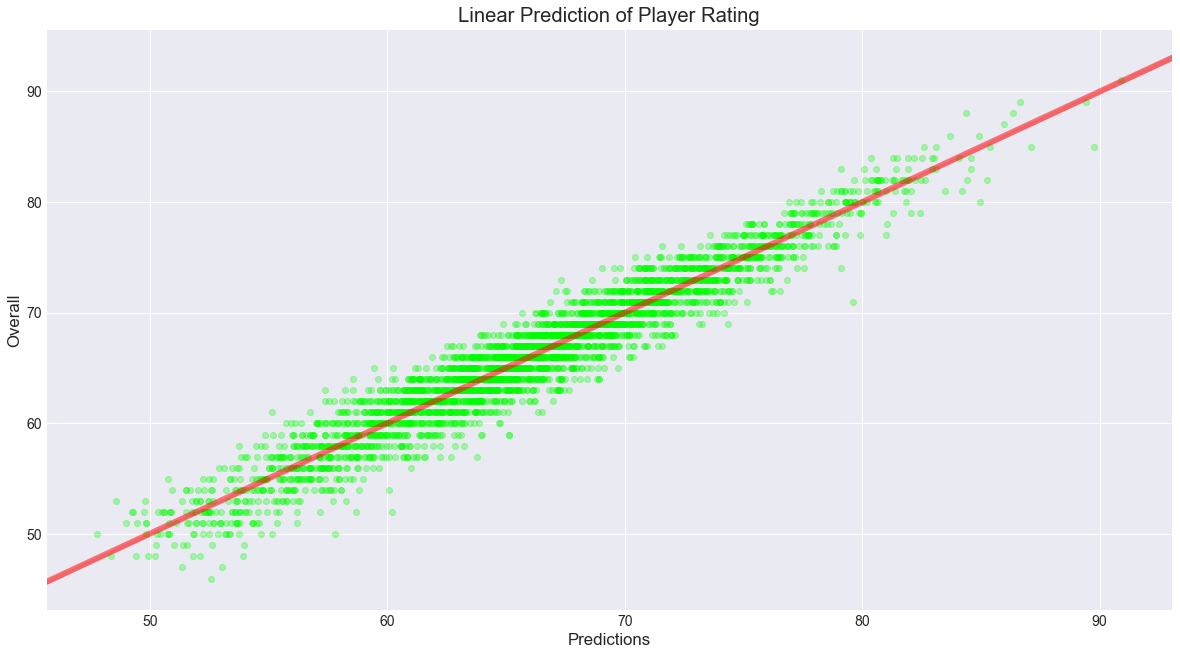

In [99]:
#Visualising the results
plt.figure(figsize = (18, 10))
sns.regplot(predictions, y_test, scatter_kws = {'alpha':0.3,'color':'lime'}, line_kws = {'color':'red','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()